In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

2023-03-14 08:50:06.128664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 08:50:09.329649: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 08:50:09.329689: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-14 08:50:20.261914: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
from datetime import datetime

In [3]:
def convert(str):
    date_obj = datetime.strptime(str, "%Y-%m-%d")
    date_int = int(date_obj.timestamp())
    return date_int

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
#tf.random.set_seed(0)

In [5]:
df = pd.read_csv('bitcoin_prices.csv')
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
limit = datetime(2020,12,31)
start = datetime(2017,1,1)
df = df[(df['Date'] <= limit )]
df = df[(df['Date'] >= start)]

In [6]:
df.head(5)

,Date,Close
2360,2017-01-01,995.44
2361,2017-01-02,1017.05
2362,2017-01-03,1033.30
2363,2017-01-04,1135.41
2364,2017-01-05,989.35


In [7]:
df.tail(5)

,Date,Close
3816,2020-12-27,26249.27
3817,2020-12-28,27039.45
3818,2020-12-29,27360.78
3819,2020-12-30,28889.61
3820,2020-12-31,28972.40


In [8]:
# download the data
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 90  # length of input sequences (lookback period)
n_forecast = 365  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

In [9]:
print(X)

[[[0.00745061]
  [0.00821727]
  [0.00879378]
  ...
  [0.00909889]
  [0.00895733]
  [0.010419  ]]

 [[0.00821727]
  [0.00879378]
  [0.01241638]
  ...
  [0.00895733]
  [0.010419  ]
  [0.0106677 ]]

 [[0.00879378]
  [0.01241638]
  [0.00723455]
  ...
  [0.010419  ]
  [0.0106677 ]
  [0.01106788]]

 ...

 [[0.26984419]
  [0.26469216]
  [0.26191606]
  ...
  [0.23169571]
  [0.23464956]
  [0.22879401]]

 [[0.26469216]
  [0.26191606]
  [0.26207322]
  ...
  [0.23464956]
  [0.22879401]
  [0.22700028]]

 [[0.26191606]
  [0.26207322]
  [0.25128206]
  ...
  [0.22879401]
  [0.22700028]
  [0.22721527]]]


In [10]:
# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=10, batch_size=32, verbose=1)

2023-03-14 08:50:32.071132: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-14 08:50:32.071186: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-14 08:50:32.071218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-7393ca): /proc/driver/nvidia/version does not exist
2023-03-14 08:50:32.080539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
32/32 [==============================] - 8s 79ms/step - loss: 0.0376
Epoch 2/10
32/32 [==============================] - 3s 84ms/step - loss: 0.0106
Epoch 3/10
32/32 [==============================] - 3s 79ms/step - loss: 0.0100
Epoch 4/10
32/32 [==============================] - 3s 81ms/step - loss: 0.0098
Epoch 5/10
32/32 [==============================] - 2s 78ms/step - loss: 0.0089
Epoch 6/10
32/32 [==============================] - 3s 84ms/step - loss: 0.0082
Epoch 7/10
32/32 [==============================] - 3s 83ms/step - loss: 0.0081
Epoch 8/10
32/32 [==============================] - 2s 69ms/step - loss: 0.0079
Epoch 9/10
32/32 [==============================] - 2s 75ms/step - loss: 0.0080
Epoch 10/10
32/32 [==============================] - 2s 76ms/step - loss: 0.0080


In [11]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 [==============================] - 1s 659ms/step


In [12]:
# organize the results in a data frame
df_past = df[['Date']]
df_past['Close'] = df[['Close']]
df_past.rename(columns={'Close': 'Actual'}, inplace=True)
df_past = df_past.reset_index()
df_past = df_past.drop('index', axis=1)
print(df_past)

           Date    Actual
0    2017-01-01    995.44
1    2017-01-02   1017.05
2    2017-01-03   1033.30
3    2017-01-04   1135.41
4    2017-01-05    989.35
...         ...       ...
1456 2020-12-27  26249.27
1457 2020-12-28  27039.45
1458 2020-12-29  27360.78
1459 2020-12-30  28889.61
1460 2020-12-31  28972.40

[1461 rows x 2 columns]


In [13]:
# Forecast
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

/tmp/ipykernel_2176/805656776.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = df_past.append(df_future).set_index('Date')


In [14]:
df_real = pd.read_csv('bitcoin_prices.csv')
df_real['Date'] = df_real['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_real = df_real[(df_real['Date'] <= datetime(2021,12,31) )]
df_real = df_real[(df_real['Date'] >= datetime(2021,1,1))]

In [15]:
df_real

,Date,Close
3821,2021-01-01,29388.94
3822,2021-01-02,32203.64
3823,2021-01-03,33063.48
3824,2021-01-04,32030.55
3825,2021-01-05,34038.29
...,...,...
4181,2021-12-27,50714.73
4182,2021-12-28,47536.39
4183,2021-12-29,46471.70
4184,2021-12-30,47129.66


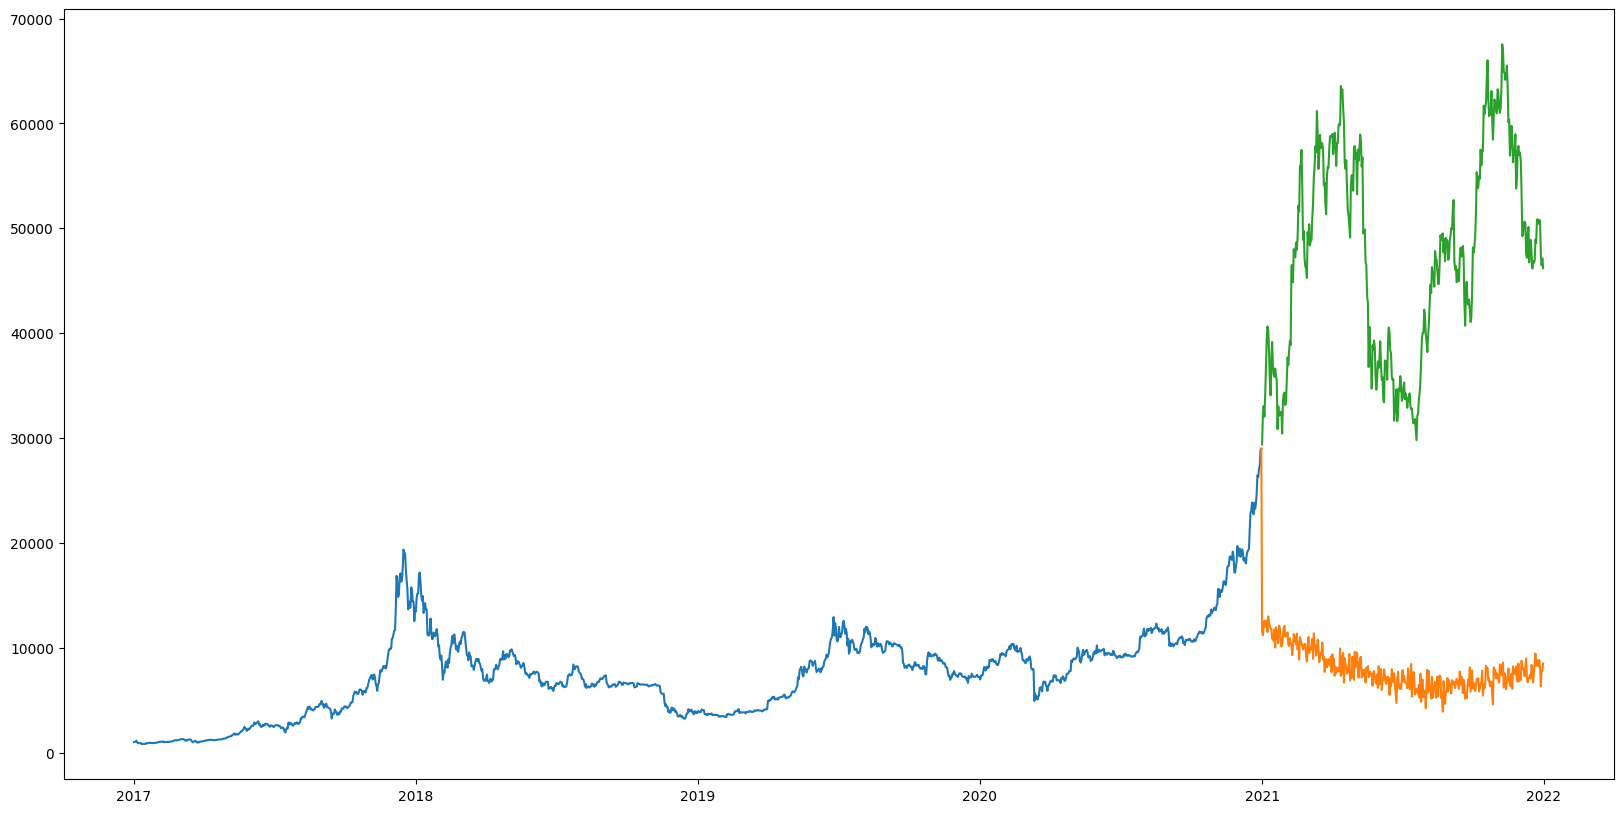

In [16]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(results)
plt.plot(df_real['Date'], df_real['Close'])

## ARIMA

In [17]:
!pip install arch

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
df_real = pd.read_csv('bitcoin_prices.csv')
df_real['Date'] = df_real['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
train_data = df_real[(df_real['Date'] <= datetime(2020,12,31) )]
train_data = train_data[(train_data['Date'] >= datetime(2011,1,1))]

In [20]:
train_data

,Date,Close
168,2011-01-01,0.3000
169,2011-01-02,0.3000
170,2011-01-03,0.2950
171,2011-01-04,0.2989
172,2011-01-05,0.2990
...,...,...
3816,2020-12-27,26249.2700
3817,2020-12-28,27039.4500
3818,2020-12-29,27360.7800
3819,2020-12-30,28889.6100


In [21]:
test_data = df_real[(df_real['Date'] <= datetime(2021,12,31) )]
test_data = test_data[(test_data['Date'] >= datetime(2021,1,1))]

In [22]:
test_data

,Date,Close
3821,2021-01-01,29388.94
3822,2021-01-02,32203.64
3823,2021-01-03,33063.48
3824,2021-01-04,32030.55
3825,2021-01-05,34038.29
...,...,...
4181,2021-12-27,50714.73
4182,2021-12-28,47536.39
4183,2021-12-29,46471.70
4184,2021-12-30,47129.66


In [23]:
import pandas as pd
import numpy as np
from arch import arch_model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model to training data
sarimax_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarimax_results = sarimax_model.fit()

# Predict Bitcoin prices using SARIMAX model and GARCH volatility
predictions = sarimax_results.forecast(len(test_data))

predictions

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10271D+00    |proj g|=  8.41685D-01

At iterate    5    f=  6.87675D+00    |proj g|=  9.03607D-02

At iterate   10    f=  6.87423D+00    |proj g|=  2.03188D-02

At iterate   15    f=  6.87421D+00    |proj g|=  6.90638D-04

At iterate   20    f=  6.87416D+00    |proj g|=  4.54845D-03

At iterate   25    f=  6.87415D+00    |proj g|=  3.64123D-04

At iterate   30    f=  6.87414D+00    |proj g|=  2.22143D-03

At iterate   35    f=  6.87404D+00    |proj g|=  3.14183D-02

At iterate   40    f=  6.87376D+00    |proj g|=  3.89688D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3653    29109.538286
3654    29233.480774
3655    29399.454777
3656    29524.315586
3657    29669.162749
            ...     
4013    38895.676666
4014    38896.336771
4015    38896.987061
4016    38897.627682
4017    38898.258778
Name: predicted_mean, Length: 365, dtype: float64

In [24]:
predictions

3653    29109.538286
3654    29233.480774
3655    29399.454777
3656    29524.315586
3657    29669.162749
            ...     
4013    38895.676666
4014    38896.336771
4015    38896.987061
4016    38897.627682
4017    38898.258778
Name: predicted_mean, Length: 365, dtype: float64

In [25]:
df_real

,Date,Close
0,2010-07-17,0.04951
1,2010-07-18,0.08584
2,2010-07-19,0.08080
3,2010-07-20,0.07474
4,2010-07-21,0.07921
...,...,...
4612,2023-03-03,22361.45000
4613,2023-03-04,22351.08000
4614,2023-03-05,22433.65000
4615,2023-03-06,22410.34000


In [26]:
df_real = pd.read_csv('bitcoin_prices.csv')
df_real['Date'] = df_real['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_real = df_real[(df_real['Date'] <= datetime(2021,12,31) )]
df_real = df_real[(df_real['Date'] >= datetime(2019,1,1))]

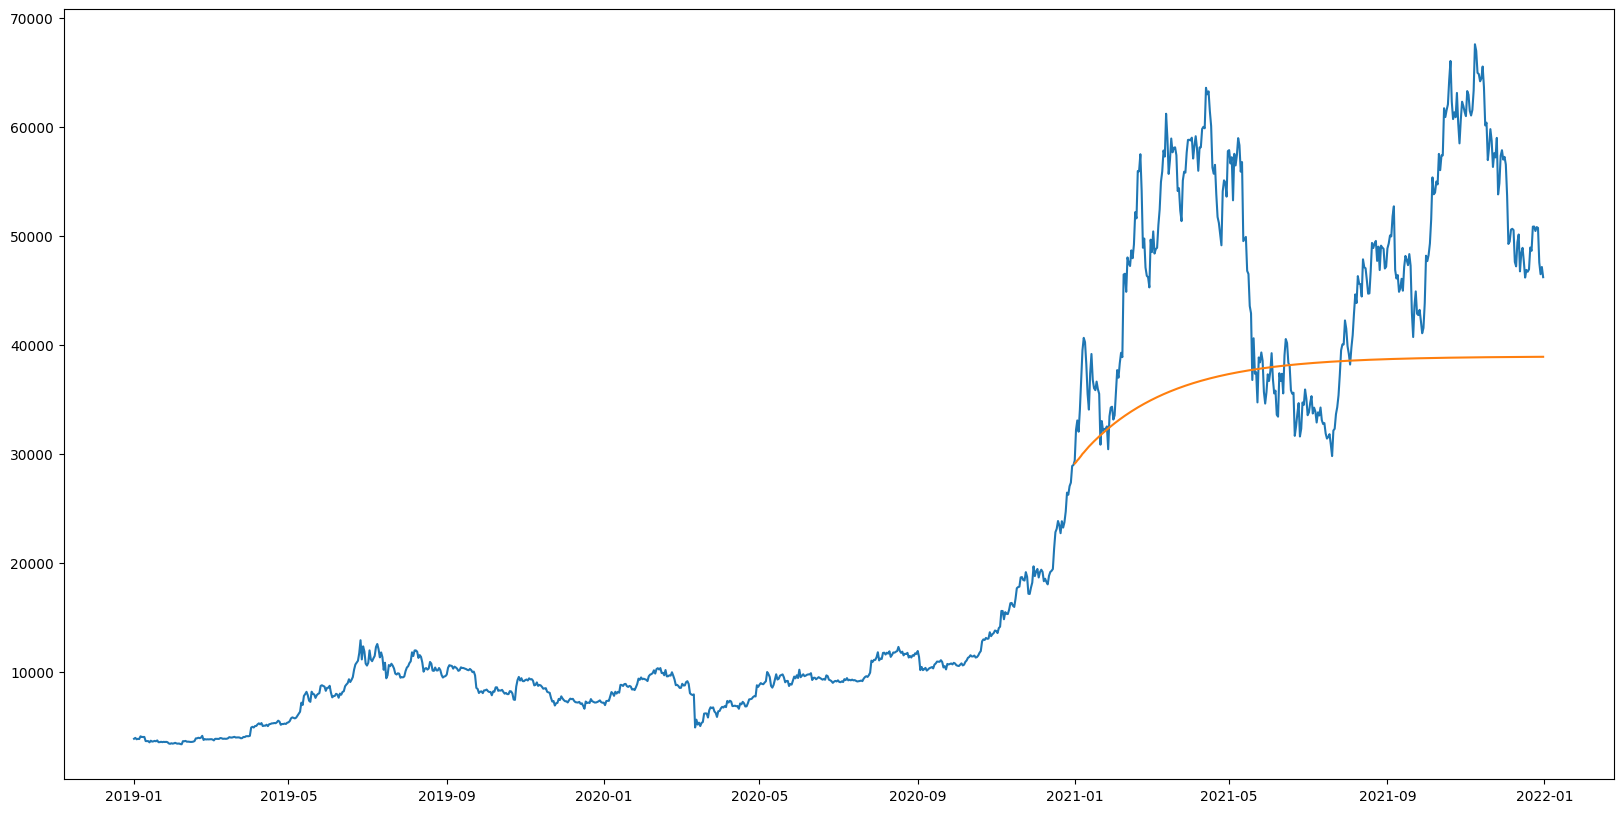

In [27]:
#plot actual vs predicted prices
plt.figure(figsize=(20,10))
plt.plot(df_real['Date'], df_real['Close'])
plt.plot(df_real['Date'].tail(365), predictions)
